Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/content/drive/MyDrive/United Airlines/Flight Level Data.csv"

In [3]:
data = pd.read_csv(filepath)

In [4]:
data.head(5)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51


In [5]:
data['company_id'].unique()

array(['OO', 'UA', 'G7', 'YX'], dtype=object)

In [6]:
data['scheduled_arrival_station_code'].unique()

array(['ROA', 'LHR', 'PHL', 'CRW', 'ATL', 'GEG', 'MSP', 'SFO', 'HND',
       'GUA', 'COS', 'SAV', 'LGA', 'TVC', 'GRR', 'SLN', 'YYZ', 'GRB',
       'PVD', 'MSY', 'CID', 'STL', 'MCO', 'ILM', 'BNA', 'XNA', 'BOI',
       'OMA', 'LAX', 'FAR', 'IND', 'SBN', 'CVG', 'AVP', 'MKE', 'ASE',
       'FSD', 'YYC', 'SLC', 'SYR', 'BOS', 'RNO', 'EWR', 'MSN', 'AMS',
       'YUL', 'YVR', 'MTY', 'GRU', 'IAD', 'DEN', 'JST', 'ATW', 'SCE',
       'JAC', 'MDT', 'PIT', 'BDL', 'DCA', 'BZN', 'OKC', 'BIL', 'DAY',
       'CAE', 'TUL', 'SAN', 'CMH', 'TYS', 'FLL', 'RDU', 'YOW', 'PWM',
       'MCI', 'LNK', 'SJU', 'ABQ', 'FOD', 'HSV', 'LAS', 'MLI', 'GSP',
       'PDX', 'DFW', 'AUS', 'JAX', 'ATH', 'FRA', 'SEA', 'AVL', 'CMX',
       'DSM', 'LEX', 'FWA', 'BGR', 'DLH', 'FCA', 'RAP', 'CLE', 'MEM',
       'CHS', 'PLN', 'SNN', 'GSO', 'YWG', 'EAU', 'TPA', 'FCO', 'DUB',
       'BWI', 'SNA', 'MBS', 'CHA', 'LIT', 'MIA', 'CAK', 'IAH', 'RSW',
       'BCN', 'ECP', 'BTV', 'CUN', 'MTJ', 'ALB', 'SRQ', 'MYR', 'SDF',
       'CHO', 'PHX',

In [7]:
data['scheduled_departure_station_code'].unique()

array(['ORD'], dtype=object)

In [8]:
data.shape

(8099, 15)

In [9]:
data.isnull().sum()

,0
company_id,0
flight_number,0
scheduled_departure_date_local,0
scheduled_departure_station_code,0
scheduled_arrival_station_code,0
scheduled_departure_datetime_local,0
scheduled_arrival_datetime_local,0
actual_departure_datetime_local,0
actual_arrival_datetime_local,0
total_seats,0


In [10]:
data['flight_number'].nunique()

624

In [11]:
# Convert ISO 8601 strings to datetime
data['scheduled_departure_datetime_local'] = pd.to_datetime(data['scheduled_departure_datetime_local'], utc=True)
data['scheduled_arrival_datetime_local'] = pd.to_datetime(data['scheduled_arrival_datetime_local'], utc=True)
data['actual_departure_datetime_local'] = pd.to_datetime(data['actual_departure_datetime_local'], utc=True)
data['actual_arrival_datetime_local'] = pd.to_datetime(data['actual_arrival_datetime_local'], utc=True)


Driving some important feature from Departure Time and Arrival Time to create different delay parameters -


* **departure_delay** - The amount of time a flight leaves later than its scheduled departure.
* **arrival_delay** - The amount of time a flight arrives later than its scheduled arrival at the destination.
* **flightfly_delay** - The actual time spent flying compared to the planned flight duration (in-air delay).



In [12]:
# Create delay columns in minutes
data['departure_delay'] = (data['actual_departure_datetime_local'] - data['scheduled_departure_datetime_local']).dt.total_seconds() / 60
data['arrival_delay'] = (data['actual_arrival_datetime_local'] - data['scheduled_arrival_datetime_local']).dt.total_seconds() / 60
data['flightfly_delay'] = (data['actual_arrival_datetime_local'] - data['actual_departure_datetime_local']).dt.total_seconds() / 60 - (data['scheduled_arrival_datetime_local'] - data['scheduled_departure_datetime_local']).dt.total_seconds() / 60

In [13]:
# Apply conditions
data['departure_delay'] = data['departure_delay'].apply(lambda x: max(x, 0))   # negative -> 0
data['arrival_delay'] = data['arrival_delay'].abs()                           # make positive
data['flightfly_delay'] = data['flightfly_delay'].abs()                       # make positive

# Flight Ground Operations Metrics

1. **Buffer**  
   Extra scheduled time beyond the minimum required turnaround.  
   *Helps measure how much spare time a flight has on the ground.*  

2. **Ground Time Utilization**  
   Ratio of actual ground time to scheduled ground time.  
   *Indicates efficiency in using the available ground time.*  

3. **Pressure on Staff**  
   Difference between actual ground time and minimum required turnaround.  
   *High pressure means staff need to work faster to meet schedules.*  

4. **Ground Time Deviation**  
   Difference between actual and scheduled ground time.  
   *Shows how much the actual turnaround deviates from the plan.*  

5. **Normalized Pressure**  
   Pressure relative to minimum required turnaround (percentage).  
   *Provides a standardized measure of how tight the schedule is.*  

6. **Turnaround Risk**  
   Binary flag: 1 if actual ground time is less than minimum required, else 0.  
   *Marks risky turnarounds that may cause delays or operational issues.*  

In [14]:
data['buffer'] = data['scheduled_ground_time_minutes'] - data['minimum_turn_minutes']

data['ground_time_utilization'] = (
    data['actual_ground_time_minutes'] / data['scheduled_ground_time_minutes']
).replace([float('inf'), -float('inf')], None)

data['pressure_on_staff'] = data['actual_ground_time_minutes'] - data['minimum_turn_minutes']

data['ground_time_deviation'] = data['actual_ground_time_minutes'] - data['scheduled_ground_time_minutes']

data['normalized_pressure'] = (
    (data['actual_ground_time_minutes'] - data['minimum_turn_minutes']) / data['minimum_turn_minutes']
).round(2)

data['turnaround_risk'] = (data['actual_ground_time_minutes'] < data['minimum_turn_minutes']).astype(int)


In [15]:
selected_columns = ['company_id',
                    'flight_number',
                    'scheduled_departure_date_local',
                    'scheduled_departure_station_code',
                    'scheduled_arrival_station_code',
                    'departure_delay',
                    'arrival_delay',
                    'flightfly_delay',
                    'buffer',
                    'ground_time_utilization',
                    'pressure_on_staff',
                    'ground_time_deviation',
                    'normalized_pressure',
                    'turnaround_risk']
flight_level_summary = data[selected_columns].copy()


In [16]:
flight_level_summary.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,departure_delay,arrival_delay,flightfly_delay,buffer,ground_time_utilization,pressure_on_staff,ground_time_deviation,normalized_pressure,turnaround_risk
0,OO,4792,2025-08-04,ORD,ROA,7.0,12.0,19.0,8,0.809524,0,-8,0.00,0
1,UA,920,2025-08-03,ORD,LHR,22.0,14.0,36.0,90,0.974468,84,-6,0.58,0
2,UA,1776,2025-08-10,ORD,PHL,111.0,111.0,0.0,25,0.907895,18,-7,0.35,0
3,OO,5790,2025-08-06,ORD,CRW,105.0,98.0,7.0,194,0.170404,9,-185,0.31,0
4,UA,1398,2025-08-05,ORD,ATL,0.0,20.0,24.0,24,0.96,21,-3,0.41,0


# Performing Some Basic EDA on Flight level Summary Dataset

In [17]:
flight_level_summary.isnull().sum()

,0
company_id,0
flight_number,0
scheduled_departure_date_local,0
scheduled_departure_station_code,0
scheduled_arrival_station_code,0
departure_delay,0
arrival_delay,0
flightfly_delay,0
buffer,0
ground_time_utilization,7


In [18]:
flight_level_summary['ground_time_utilization'] = flight_level_summary['ground_time_utilization'].fillna(0)

/tmp/ipython-input-1416443664.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flight_level_summary['ground_time_utilization'] = flight_level_summary['ground_time_utilization'].fillna(0)


In [19]:
flight_level_summary.duplicated().sum()

np.int64(0)

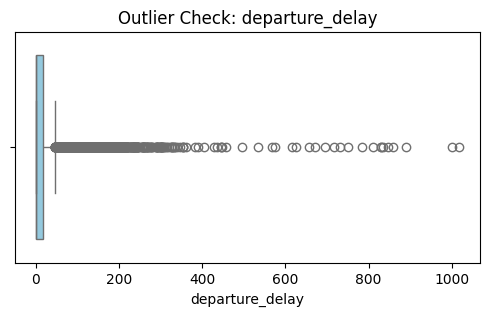

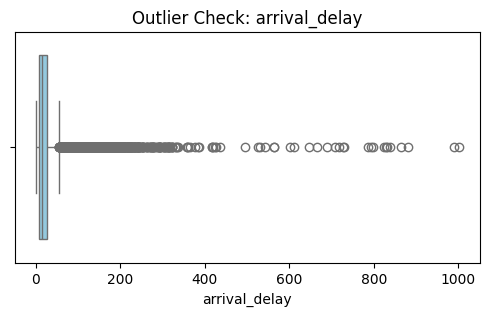

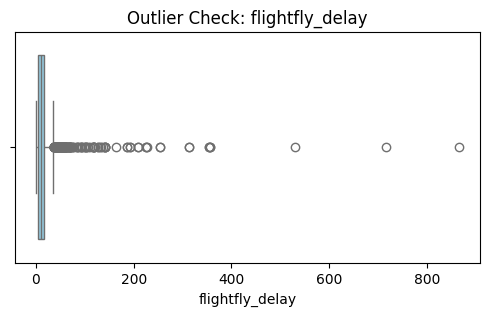

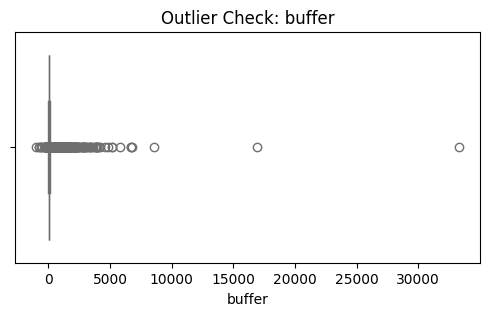

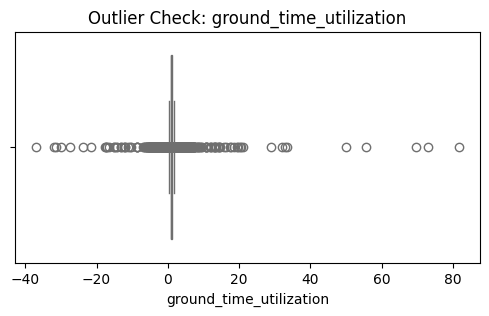

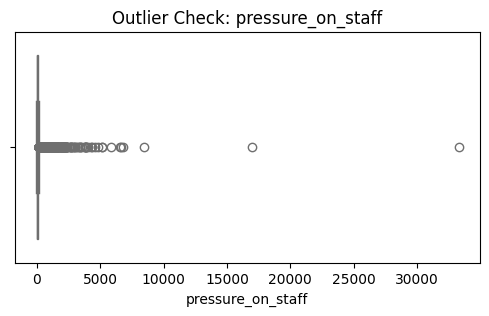

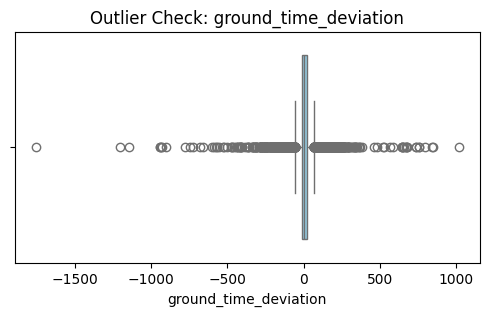

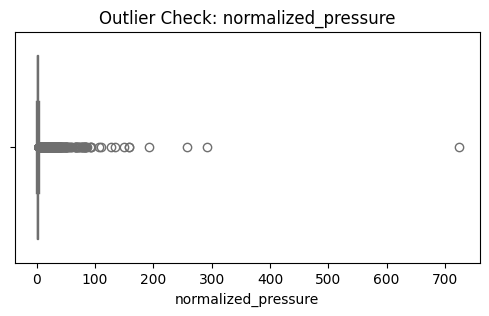

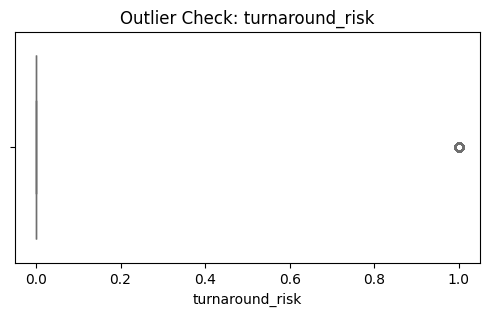

In [20]:
# List of numeric cols to check
num_cols = [
    'departure_delay', 'arrival_delay', 'flightfly_delay',
    'buffer', 'ground_time_utilization',
    'pressure_on_staff', 'ground_time_deviation',
    'normalized_pressure', 'turnaround_risk'
]

# Boxplots for quick visual inspection
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=flight_level_summary[col], color="skyblue")
    plt.title(f"Outlier Check: {col}")
    plt.show()


Not removing outlier becuase they are the important part of data

# Visualizing and Analysing Data

## Delay Analysis

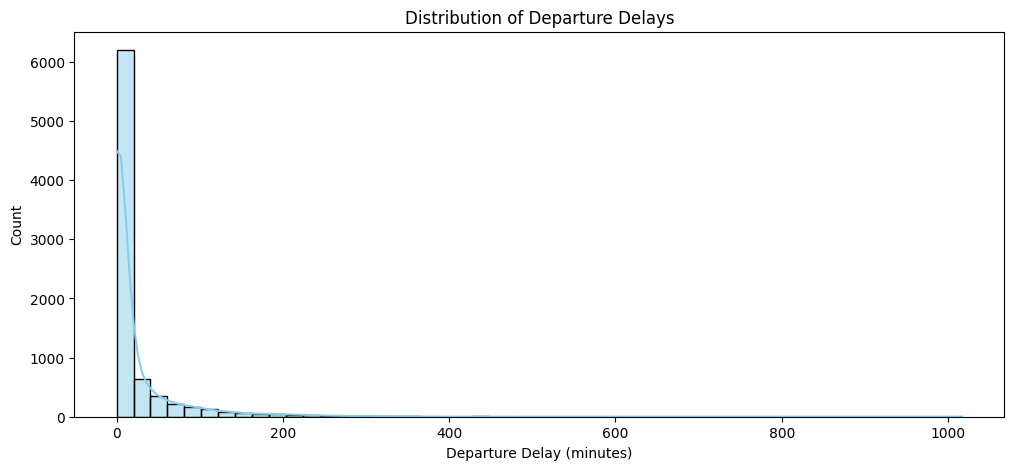

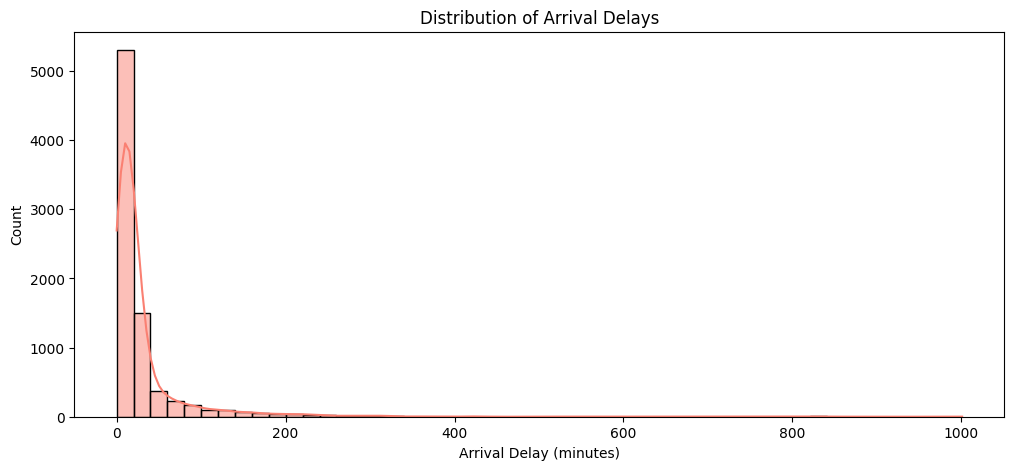

In [21]:
# Distribution of Departure Delay
plt.figure(figsize=(12,5))
sns.histplot(flight_level_summary['departure_delay'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.show()

# Distribution of Arrival Delay
plt.figure(figsize=(12,5))
sns.histplot(flight_level_summary['arrival_delay'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.show()

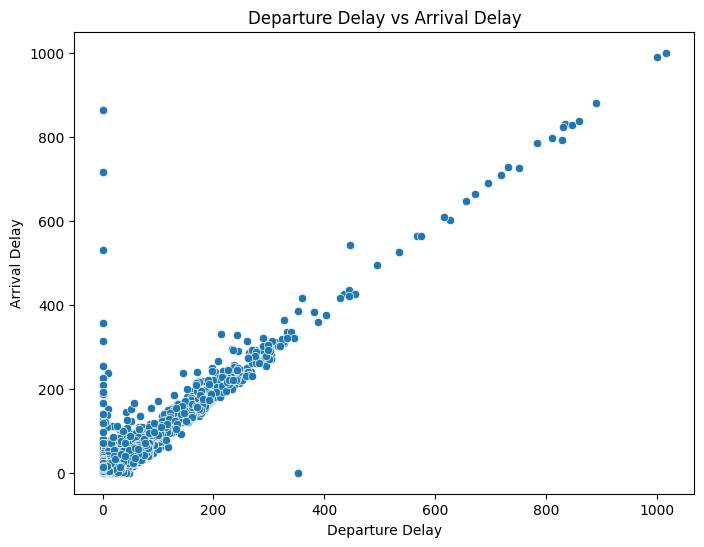

In [22]:
# Scatter plot: departure vs arrival delay
plt.figure(figsize=(8,6))
sns.scatterplot(data=flight_level_summary, x='departure_delay', y='arrival_delay')
plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()

## Flight Fly Delay

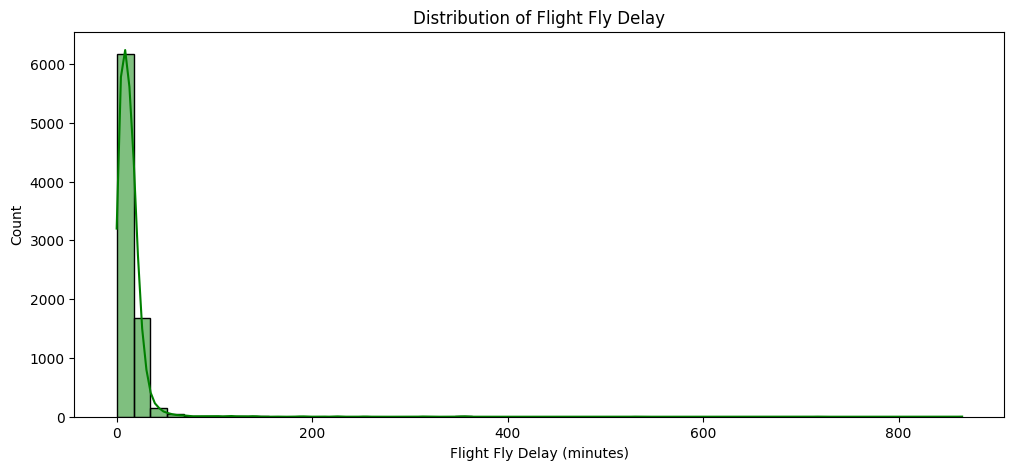

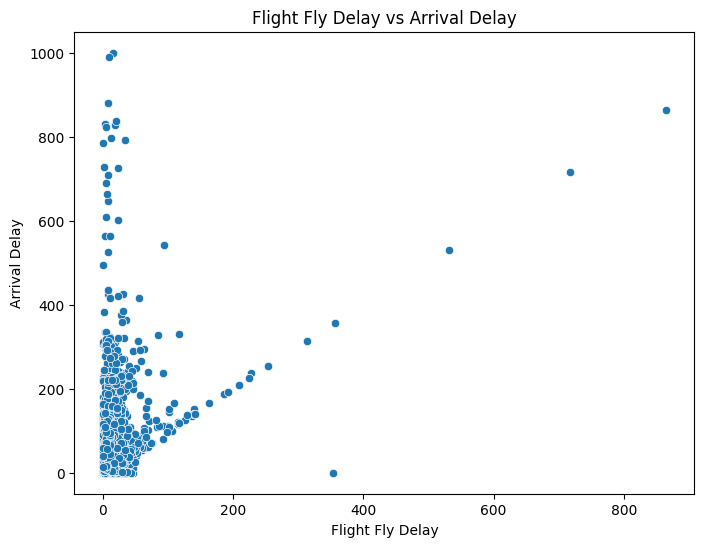

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(flight_level_summary['flightfly_delay'], bins=50, kde=True, color='green')
plt.title("Distribution of Flight Fly Delay")
plt.xlabel("Flight Fly Delay (minutes)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=flight_level_summary, x='flightfly_delay', y='arrival_delay')
plt.title("Flight Fly Delay vs Arrival Delay")
plt.xlabel("Flight Fly Delay")
plt.ylabel("Arrival Delay")
plt.show()


## Ground Time / Buffer Analysis

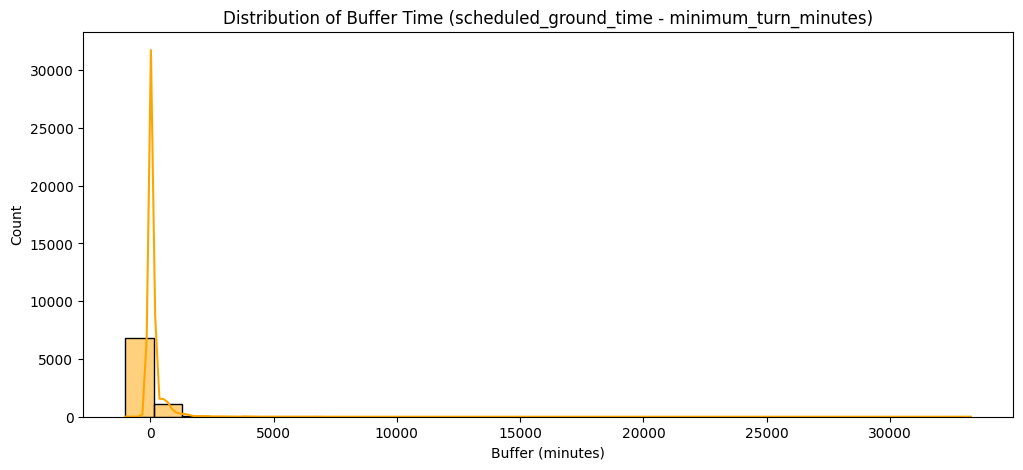

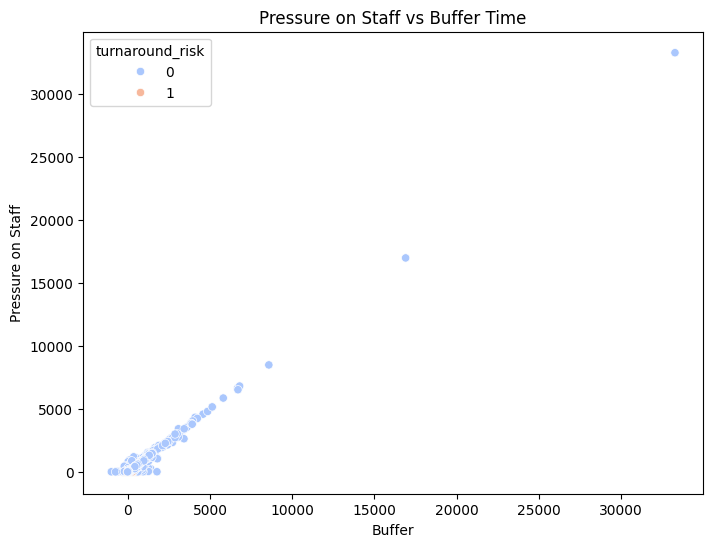

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(flight_level_summary['buffer'], bins=30, kde=True, color='orange')
plt.title("Distribution of Buffer Time (scheduled_ground_time - minimum_turn_minutes)")
plt.xlabel("Buffer (minutes)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=flight_level_summary, x='buffer', y='pressure_on_staff', hue='turnaround_risk', palette='coolwarm')
plt.title("Pressure on Staff vs Buffer Time")
plt.xlabel("Buffer")
plt.ylabel("Pressure on Staff")
plt.show()


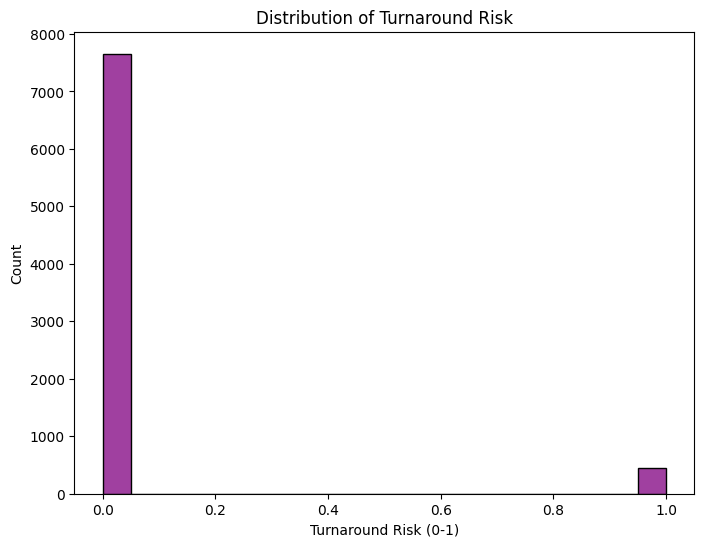

In [25]:
# Turnaround Risk
plt.figure(figsize=(8,6))
sns.histplot(flight_level_summary['turnaround_risk'], bins=20, kde=False, color='purple')
plt.title("Distribution of Turnaround Risk")
plt.xlabel("Turnaround Risk (0-1)")
plt.show()

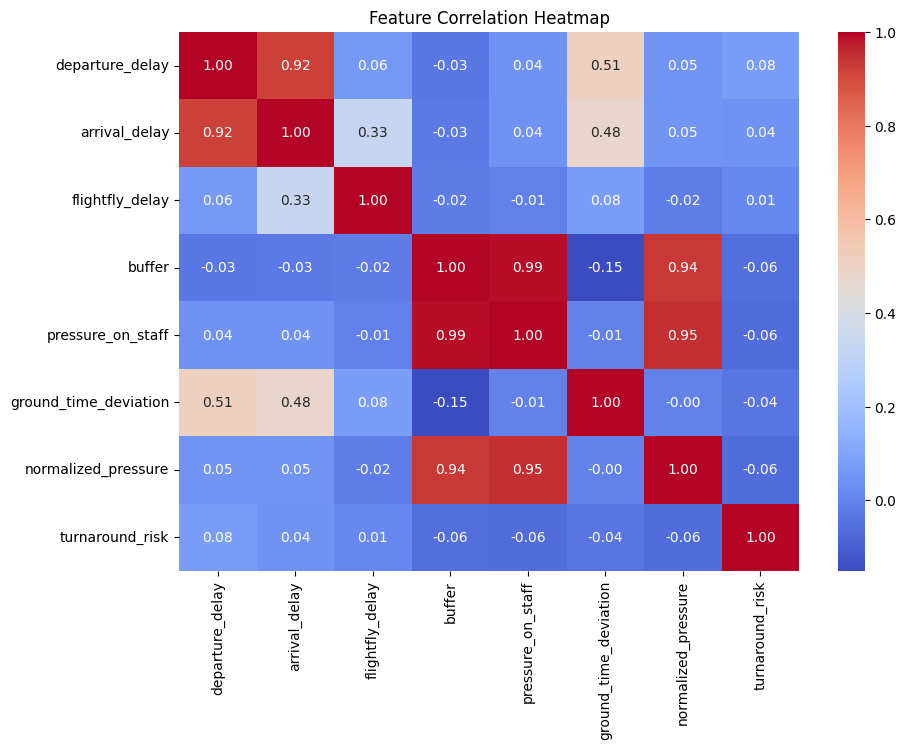

In [26]:
# Feature Correlation Heatmap
plt.figure(figsize=(10,7))
corr_cols = ['departure_delay','arrival_delay','flightfly_delay','buffer',
             'pressure_on_staff','ground_time_deviation','normalized_pressure','turnaround_risk']
sns.heatmap(flight_level_summary[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Calculating Delay Complexity Score

In this section, we compute the **Delay Complexity Score** for each flight. This score quantifies how challenging a flight is based on **delays and ground operations**.

We consider multiple factors:

**Departure**, **Arrival**, and **Flight** **Delay** – captures the actual delay experienced by the flight.

**Buffer Time** – smaller buffer indicates higher complexity.

**Pressure on Staff** – measures how tight the turnaround is relative to minimum required time.

**Ground Time Deviation** – difference between actual and scheduled ground time.

**Normalized Pressure** – relative measure of pressure based on minimum turnaround time.

**Turnaround Risk** – binary flag indicating if turnaround is below the minimum safe threshold.

In [27]:
# Handle departure/arrival/flight delays
flight_level_summary['dep_score'] = flight_level_summary['departure_delay'].apply(lambda x: max(x, 0))  # only positive delays
flight_level_summary['arr_score'] = flight_level_summary['arrival_delay'].abs()  # absolute value
flight_level_summary['flightfly_score'] = flight_level_summary['flightfly_delay'].abs()  # absolute value

# Handle ground time / buffer / pressure features
# Buffer score: smaller buffer → higher complexity
flight_level_summary['buffer_score'] = 1 / (flight_level_summary['buffer'] + 1)

# Replace infinite or extremely large values
flight_level_summary['buffer_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
flight_level_summary['buffer_score'] = flight_level_summary['buffer_score'].clip(upper=10)
flight_level_summary['buffer_score'].fillna(flight_level_summary['buffer_score'].median(), inplace=True)

# Pressure score
flight_level_summary['pressure_score'] = flight_level_summary['pressure_on_staff'].abs()

# Ground time deviation
flight_level_summary['ground_dev_score'] = flight_level_summary['ground_time_deviation'].abs()

# Normalized pressure
flight_level_summary['norm_pressure_score'] = flight_level_summary['normalized_pressure']

# Turnaround risk (0-1 already)
flight_level_summary['turnaround_risk_score'] = flight_level_summary['turnaround_risk']

# -------------------------------
# Prepare for scaling
# -------------------------------
columns_to_scale = [
    'dep_score', 'arr_score', 'flightfly_score', 'buffer_score',
    'pressure_score', 'ground_dev_score', 'norm_pressure_score', 'turnaround_risk_score'
]

# Convert all to numeric and fill any remaining NaNs
for col in columns_to_scale:
    flight_level_summary[col] = pd.to_numeric(flight_level_summary[col], errors='coerce')
    flight_level_summary[col] = flight_level_summary[col].replace([np.inf, -np.inf], np.nan)
    flight_level_summary[col].fillna(flight_level_summary[col].median(), inplace=True)

# -------------------------------
# Scale all components 0-1
# -------------------------------
scaler = MinMaxScaler()
flight_level_summary[columns_to_scale] = scaler.fit_transform(flight_level_summary[columns_to_scale])

# -------------------------------
#  Weighted sum to calculate delay complexity score
# -------------------------------
weights = {
    'dep_score': 0.2,
    'arr_score': 0.2,
    'flightfly_score': 0.15,
    'buffer_score': 0.1,
    'pressure_score': 0.1,
    'ground_dev_score': 0.1,
    'norm_pressure_score': 0.1,
    'turnaround_risk_score': 0.05
}

flight_level_summary['delay_complexity_score'] = sum(flight_level_summary[col] * w for col, w in weights.items())


/tmp/ipython-input-3133577258.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_level_summary['buffer_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-3133577258.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [28]:
flight_level_summary[['company_id', 'flight_number', 'scheduled_departure_date_local',
                            'scheduled_departure_station_code', 'scheduled_arrival_station_code',
                            'delay_complexity_score']].head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,delay_complexity_score
0,OO,4792,2025-08-04,ORD,ROA,0.063216
1,UA,920,2025-08-03,ORD,LHR,0.064726
2,UA,1776,2025-08-10,ORD,PHL,0.096567
3,OO,5790,2025-08-06,ORD,CRW,0.102452
4,UA,1398,2025-08-05,ORD,ATL,0.060584


In [29]:
flight_level_summary.to_csv('flight_level_summary.csv', index=False)